    
    1. FEATURE_NAMES berisi array column sepal lenght, sepal width, petal lenght, dan petal width
    2. load file csv pada variabel iris
    3. membuat variabel untuk labelencoder() yang nantinya akan mengubah data dalam column variety menjadi number
    4. variabel x diisi oleh dataframe iris yang berisi array dari FEATURE_NAMES
    5. variabel y diisi oleh data variety yang telah diubah nilai menjadi number


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

FEATURE_NAMES = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

iris = pd.read_csv("csvv.csv")
variasi = preprocessing.LabelEncoder()
variasi.fit(iris.variety)

X = pd.DataFrame(iris, columns = FEATURE_NAMES)
y = variasi.transform(iris.variety)

# Melihat isi variabel x sebanyak 150 data 

In [2]:
X[:150]

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Melihat isi variabel y sebanyak 150 data

In [3]:
y[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# memecah data dengan test_size 35% dengan random_state sebanyak nim bilangan acak

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=96218053)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (97, 4) (97,)
Test set: (53, 4) (53,)


    1. membuat decision tree dengan criterion gini dengan max_depth 3
    2. mengisi data model dengan x_train sebagai supervised data dan y_train sebagai target data

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

# menggenerate graphviz dari decision tree model yang outputnya tree.dot

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

# mengganti format tree.dot menjadi tree.png

In [7]:
!dot -Tpng tree.dot -o tree.png

# menampilkan tree.png

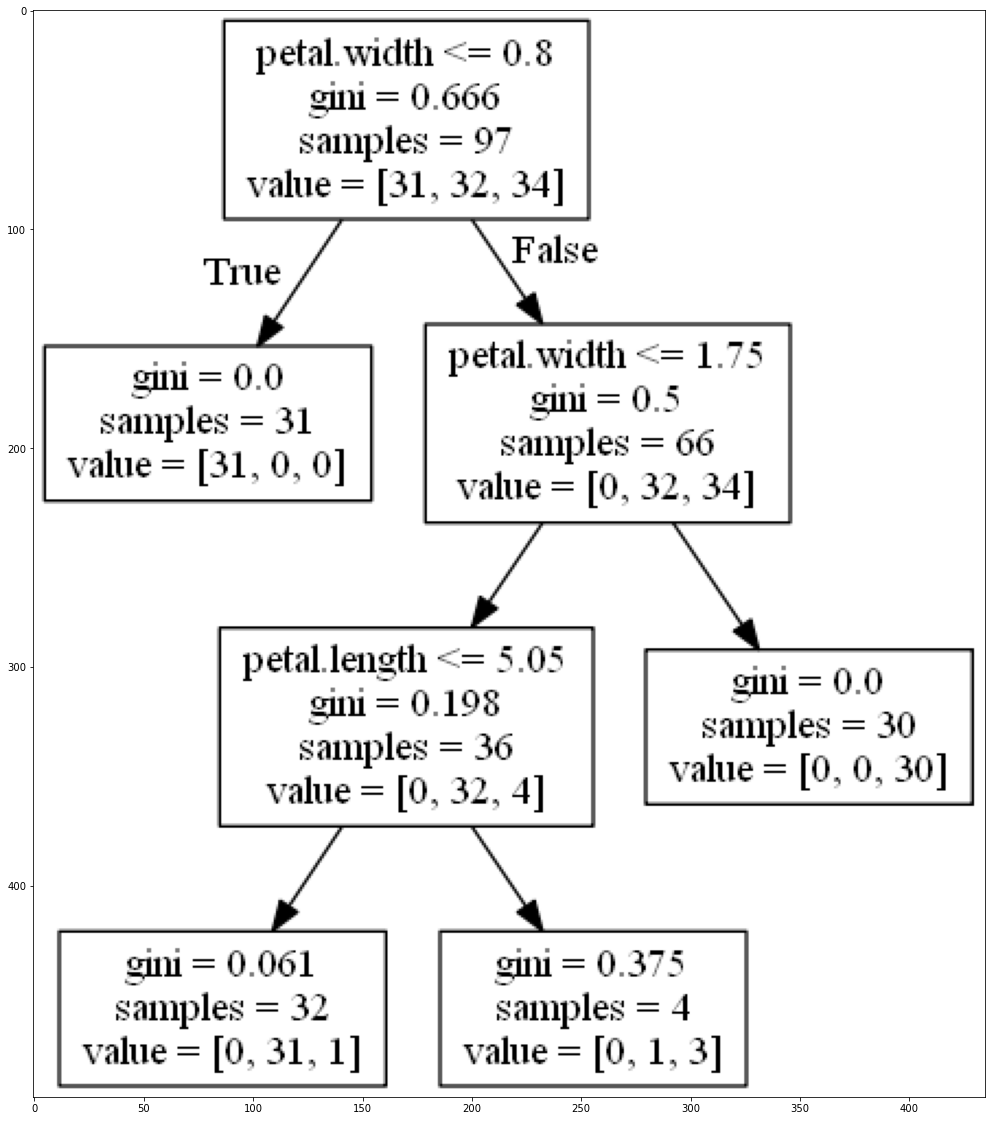

In [8]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

# Melakukan predictions decision tree model menggunakan nilai x_test

In [9]:
predictedTree = model.predict(X_test)

# Menghitung nilai akurasi berdasarkan nilai absolut y_test dan nilai prediksi predictedTree

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictedTree)

0.9622641509433962

# Menampilkan text report dari klasifikasi matriks nilai absolut dan nilai prediksi

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        16

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53

